# Практическая работа №1: Моделирование стандартных дискретных сигналов

Выполнили студенты гр. 0382 Прибылов Никита и Морева Елена. Вариант №15.

## Цель работы

Изучить математическое описание стандартных дискретных сигналов и овладеть программными средствами их моделирования. 

## Основные теоретические положения

**Единичный цифровой импульс** — дискретный аналог дельта-функции: 
$$\delta_d(k) = \begin{cases}1, & k = 0,\\0, & k \neq 0.\end{cases}, \quad k \in \mathbb{Z}$$

**Дискретный единичный скачок** — дискретный аналог функции единичного скачка (функции Хэвисайда): 
$$\sigma_d(k) = \begin{cases}1, & k\geq0,\\ 0,& k < 0.\end{cases}, \quad k \in \mathbb{Z}$$

**Дискретная экспоненциальная функция** — дискретный аналог экспоненциальной функции: 
$$s_1(k) = \begin{cases}a^k, & k \ge 0,\\ 0, & k < 0,\end{cases}, \quad k \in \mathbb{Z}$$

**Дискретный комплексный гармонический сигнал** — дискретный аналог функции синуса и косинуса: 
$$s_2(k)=Ce^{j\hat\omega_0k}, \quad k \in \mathbb{Z}$$

## Постановка задачи

С помощью программных средств провести моделирование и анализ стандартных дискретных последовательностей. Результаты подкрепить соответствующими графиками и выводами. 

## Выполнение работы

Инициализация начальных значений:

In [116]:
import numpy as np
import matplotlib.pyplot as plt

Nb = 15
N = 30 + Nb % 5
T = 0.0005 * (1 + Nb % 3)
a = (-1)**Nb * (0.8 + 0.005 * (Nb % 20))
C = 1 + Nb % 5
omega_0 = np.pi / (6 + Nb % 5)
m = 5 + Nb % 5

print(f'{Nb=}, {N=}, {T=}, {a=}, {C=}, {omega_0=}, {m=}')

Nb=15, N=30, T=0.0005, a=-0.875, C=1, omega_0=0.5235987755982988, m=5


Вспомогательная функция отрисовки графиков:

In [117]:
def plot(x, y, title, xlabel, ylabel):
    plt.figure(figsize=(10, 5))
    plt.stem(x, y)
    plt.grid()
    plt.title(title)
    plt.xlabel(xlabel)
    plt.ylabel(ylabel)
    plt.show()

**Задание 1**

Был смоделирован единичный цифровой импульс $\delta_d(k)$ на интервалах дискретного времени $nT \in [0, (N-1)T]$ и дискретного нормированного времени $n \in [0, N-1]$. 

Дискретное время - $nT$, где $T$ - период дискретизации.

Дискретное нормированное время - это дискретное время с $T = 1$.

Единичный цифровой импульс - дискретный аналог дельта-функции, с тем лишь отличием, что в точке начала отсчёта значение принимается равным $1$, а не $\infty$.

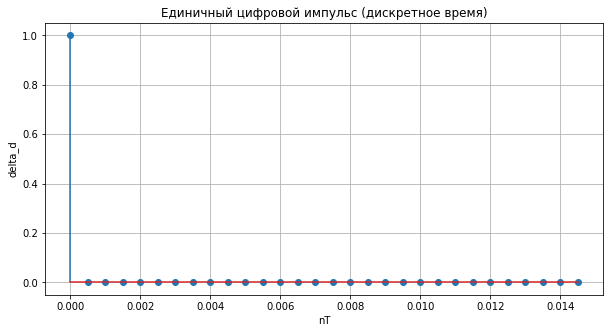

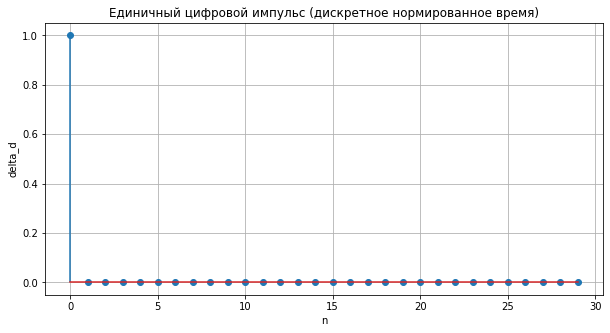

In [118]:
delta_d = lambda k: 1 if k == 0 else 0

X = [n * T for n in range(N)]
Y = [delta_d(n) for n in range(N)]

plot(X, Y, 'Единичный цифровой импульс (дискретное время)', 'nT', 'delta_d')

X = [n for n in range(N)]

plot(X, Y, 'Единичный цифровой импульс (дискретное нормированное время)', 'n', 'delta_d')

**Задание 2**

Был смоделирован дискретный единичный скачок $\sigma_d(k)$ на интервалах дискретного времени $nT \in [0, (N-1)T]$ и дискретного нормированного времени $n \in [0, N-1]$. 

Дискретный цифровой скачок - дискретный вариант аналогового цифрового скачка, но в начале отсчёта значение принимается равным $1$, тогда как у аналогового скачка оно либо $0.5$, либо не определено.

Частота дискретизации дискретного цифрового скачка - величина, обратная периоду дискретизации:
$f_d = \frac{1}{T}$

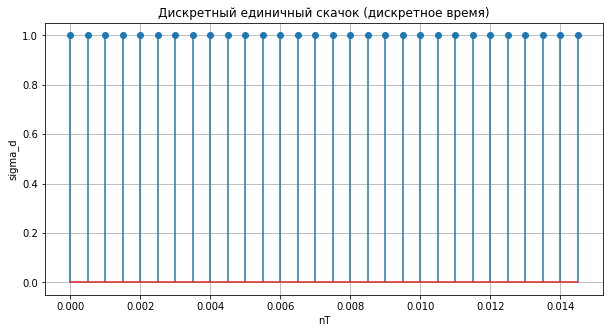

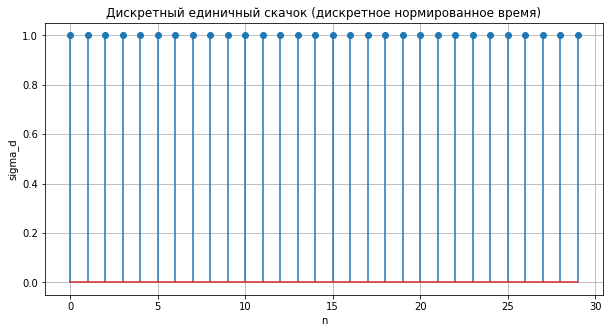

In [119]:
sigma_d = lambda k: 1 if k >= 0 else 0

X = [n * T for n in range(N)]
Y = [sigma_d(n) for n in range(N)]

plot(X, Y, 'Дискретный единичный скачок (дискретное время)', 'nT', 'sigma_d')

X = [n for n in range(N)]

plot(X, Y, 'Дискретный единичный скачок (дискретное нормированное время)', 'n', 'sigma_d')

**Задание 3**

Была смоделирована дискретная экспоненциальная функция $s_1(k)$ на интервалах дискретного времени $nT \in [0, (N-1)T]$ и дискретного нормированного времени $n \in [0, N-1]$. 

У дискретной экспоненты в отрицательной полуплоскости значения принимаются равными $0$, в отличие от аналоговой.

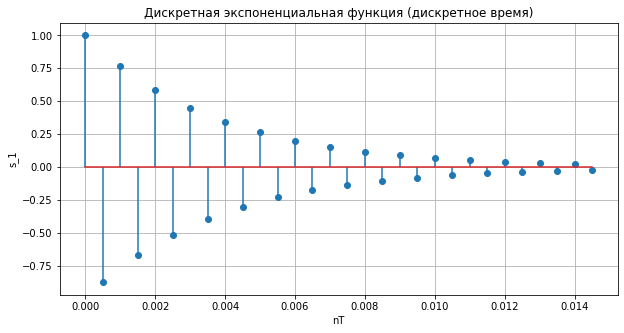

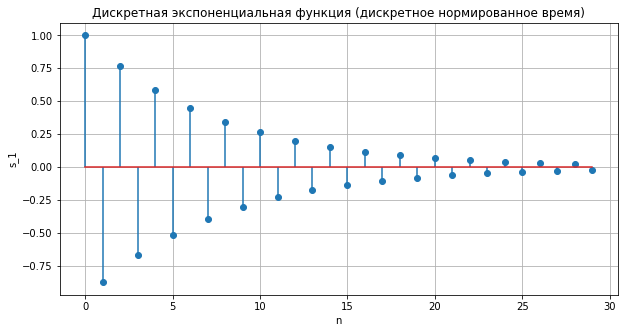

In [120]:
s_1 = lambda k: a**k if k >= 0 else 0

X = [n * T for n in range(N)]
Y = [s_1(n) for n in range(N)]

plot(X, Y, 'Дискретная экспоненциальная функция (дискретное время)', 'nT', 's_1')

X = [n for n in range(N)]

plot(X, Y, 'Дискретная экспоненциальная функция (дискретное нормированное время)', 'n', 's_1')

**Задание 4**

Был смоделирован дискретный комплексный гармонический сигнал $s_2(k)$ на вещественной и мнимой плоскостях на интервале дискретного нормированного времени $n \in [0, N-1]$. 

Воспользовавшись формулой Эйлера $e^{j\varphi} = \cos(\varphi) + j\sin(\varphi)$, данный сигнал можно представить в виде комбинации синусов и косинусов:

$$Ce^{j\hat\omega_0 k} = C(\cos(\hat\omega_0 k) + j\sin(\hat\omega_0 k))$$

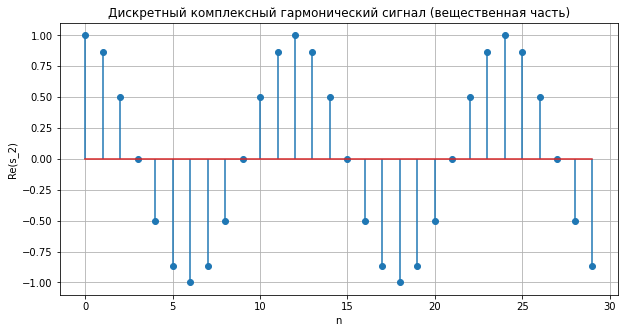

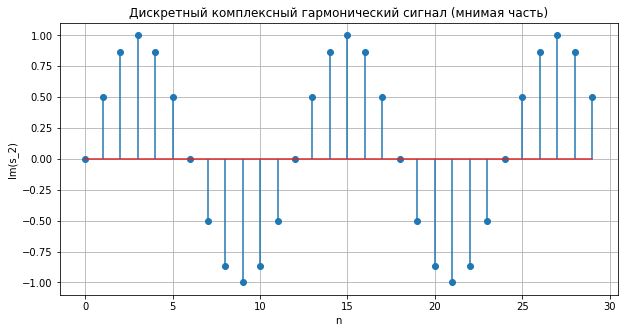

In [121]:
s_2 = lambda k: C * np.exp(1j * omega_0 * k)

X = np.arange(N)
Y = s_2(X).real

plot(X, Y, 'Дискретный комплексный гармонический сигнал (вещественная часть)', 'n', 'Re(s_2)')

Y = s_2(X).imag

plot(X, Y, 'Дискретный комплексный гармонический сигнал (мнимая часть)', 'n', 'Im(s_2)')

**Задание 5**

Были смоделированы дискретные сигналы $\delta_d(k)$, $\sigma_d(k)$ и $s_1(k)$, задержанные на $m$ отсчётов, на интервале дискретного нормированного времени $n \in [0, N-1]$. Соответствующие формулы приобретают вид:

$$\delta_d(k-m) = \begin{cases}1, & k = m,\\0, & k \neq m.\end{cases}, \quad k \in \mathbb{Z}$$

$$\sigma_d(k-m) = \begin{cases}1, & k\geq m,\\ 0,& k < m.\end{cases}, \quad k \in \mathbb{Z}$$

$$s_1(k-m) = \begin{cases}a^{k-m}, & k \ge m,\\ 0, & k < m,\end{cases}, \quad k \in \mathbb{Z}$$

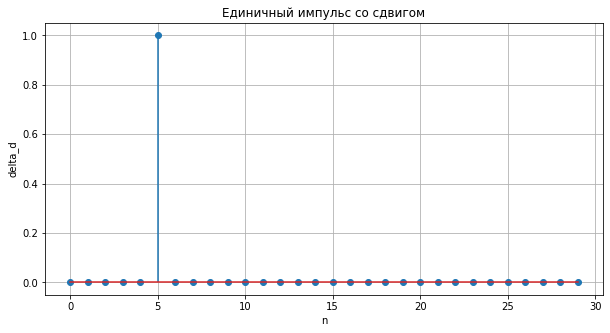

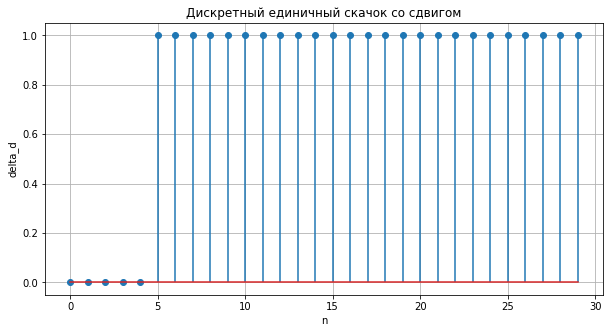

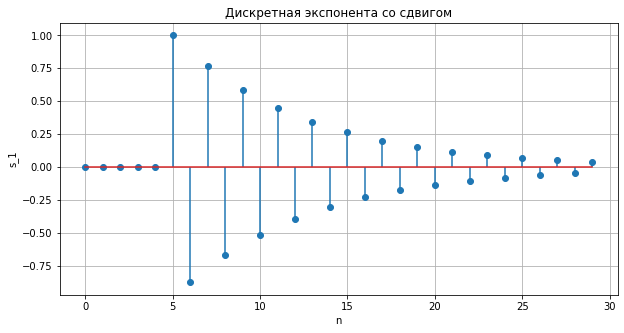

In [122]:
X = [n for n in range(N)]
Y = [delta_d(n-m) for n in range(N)]

plot(X, Y, 'Единичный импульс со сдвигом', 'n', 'delta_d')

Y = [sigma_d(n-m) for n in range(N)]

plot(X, Y, 'Дискретный единичный скачок со сдвигом', 'n', 'delta_d')

Y = [s_1(n-m) for n in range(N)]

plot(X, Y, 'Дискретная экспонента со сдвигом', 'n', 's_1')

## Выводы

В ходе работы были смоделированы единичный цифровой импульс, дискретный единичный скачок, дискретная экспоненциальная функция на интервалах дискретного времени и дискретного нормированного времени, а также варианты этих функций со сдвигом. Были указаны соответствия между вышеупомянутыми функциями и их непрерывными аналогами. Также был смоделирован дискретный комплексный гармонический сигнал в виде вещественной и мнимой частей. Для каждого сигнала были приведены их графики.